In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import os
from acquire import get_titanic_data
from prepare import clean_titanic
from env import host,db,protocol,password,user,mysqlcon
import wrangle
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import acquire
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

### Lesson on Regression & Regression Exercise

In [2]:
filename = "student_grades.csv"
os.path.isfile(filename)

True

In [3]:
def aquire_student_grades():
    filename = "student_grades.csv"

    mysqlcon=f"{protocol}://{user}:{password}@{host}/{db}"

    if os.path.isfile(filename):
        df = pd.read_csv(filename)
        
      # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)
        return df
    
  


In [4]:
df=aquire_student_grades()

In [5]:
df = pd.read_csv(filename)

In [6]:
df = df.drop(columns='student_id')

In [7]:
df.isna().sum()

Unnamed: 0.36    0
Unnamed: 0.35    0
Unnamed: 0.34    0
Unnamed: 0.33    0
Unnamed: 0.32    0
Unnamed: 0.31    0
Unnamed: 0.30    0
Unnamed: 0.29    0
Unnamed: 0.28    0
Unnamed: 0.27    0
Unnamed: 0.26    0
Unnamed: 0.25    0
Unnamed: 0.24    0
Unnamed: 0.23    0
Unnamed: 0.22    0
Unnamed: 0.21    0
Unnamed: 0.20    0
Unnamed: 0.19    0
Unnamed: 0.18    0
Unnamed: 0.17    0
Unnamed: 0.16    0
Unnamed: 0.15    0
Unnamed: 0.14    0
Unnamed: 0.13    0
Unnamed: 0.12    0
Unnamed: 0.11    0
Unnamed: 0.10    0
Unnamed: 0.9     0
Unnamed: 0.8     0
Unnamed: 0.7     0
Unnamed: 0.6     0
Unnamed: 0.5     0
Unnamed: 0.4     0
Unnamed: 0.3     0
Unnamed: 0.2     0
Unnamed: 0.1     0
Unnamed: 0       0
exam1            1
exam2            0
exam3            1
final_grade      0
dtype: int64

In [8]:
df['exam3'].isna().value_counts()

False    103
True       1
Name: exam3, dtype: int64

In [9]:
df['exam1'].isna().value_counts()

False    103
True       1
Name: exam1, dtype: int64

In [10]:
df.dropna().shape

(102, 41)

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.36  102 non-null    int64  
 1   Unnamed: 0.35  102 non-null    int64  
 2   Unnamed: 0.34  102 non-null    int64  
 3   Unnamed: 0.33  102 non-null    int64  
 4   Unnamed: 0.32  102 non-null    int64  
 5   Unnamed: 0.31  102 non-null    int64  
 6   Unnamed: 0.30  102 non-null    int64  
 7   Unnamed: 0.29  102 non-null    int64  
 8   Unnamed: 0.28  102 non-null    int64  
 9   Unnamed: 0.27  102 non-null    int64  
 10  Unnamed: 0.26  102 non-null    int64  
 11  Unnamed: 0.25  102 non-null    int64  
 12  Unnamed: 0.24  102 non-null    int64  
 13  Unnamed: 0.23  102 non-null    int64  
 14  Unnamed: 0.22  102 non-null    int64  
 15  Unnamed: 0.21  102 non-null    int64  
 16  Unnamed: 0.20  102 non-null    int64  
 17  Unnamed: 0.19  102 non-null    int64  
 18  Unnamed: 0

In [13]:
df['exam1'].value_counts()

70.0     16
100.0     8
98.0      8
83.0      8
93.0      8
79.0      8
92.0      8
62.0      8
58.0      8
57.0      8
85.0      7
73.0      7
Name: exam1, dtype: int64

In [14]:
df['exam1'] = df.exam1.astype(int)
df['exam3'] = df.exam3.astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0.36  102 non-null    int64
 1   Unnamed: 0.35  102 non-null    int64
 2   Unnamed: 0.34  102 non-null    int64
 3   Unnamed: 0.33  102 non-null    int64
 4   Unnamed: 0.32  102 non-null    int64
 5   Unnamed: 0.31  102 non-null    int64
 6   Unnamed: 0.30  102 non-null    int64
 7   Unnamed: 0.29  102 non-null    int64
 8   Unnamed: 0.28  102 non-null    int64
 9   Unnamed: 0.27  102 non-null    int64
 10  Unnamed: 0.26  102 non-null    int64
 11  Unnamed: 0.25  102 non-null    int64
 12  Unnamed: 0.24  102 non-null    int64
 13  Unnamed: 0.23  102 non-null    int64
 14  Unnamed: 0.22  102 non-null    int64
 15  Unnamed: 0.21  102 non-null    int64
 16  Unnamed: 0.20  102 non-null    int64
 17  Unnamed: 0.19  102 non-null    int64
 18  Unnamed: 0.18  102 non-null    int64
 19  Unnamed:

In [16]:
def clean_student_grades(df):
    '''
    clean_student_grades(df) takes in a single pandas dataframe
    removed the student id columns, removes records with null values, and cast any floats
    into integers.Returns a clead df.
    '''
    #drops student_id column
    df = df.drop(columns='student_id')
    #drops na values 
    df = df.dropna()
    #turn whole df into a integer. float values match int values
    df = df.astype(int)
    return df

In [17]:
def split_my_students(df):
    '''
    split_my_students(df) takes in a a clean dataframe, referencing the cleaned
    version of student data. Split the data into train, validate, test
    
    pass df as an arguement in the function 
    returns: train, validate, test: three pandas dataframes
    '''
    train_val, test = train_test_split(df, random_state=1349, train_size=0.7)
    
    train, validate = train_test_split(train_val, random_state=1349, train_size=.10)
    
    return train, validate, test

In [18]:
def wrangle_grades():
    '''
    wrangle_grades does the split and clean and returns the data'''
    return split_my_students(
        clean_student_grades(
            aquire_student_grades()))

In [19]:
train, validate, test = wrangle_grades()

In [20]:
train.shape, validate.shape, test.shape

((7, 41), (64, 41), (31, 41))

### Exercise Regression Zillow

## Acquire Data

In [21]:
#pulled in data dictionary zillow data
dd = pd.read_excel('zillow_data_dictionary.xlsx')

In [22]:
dd

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (if any)
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
2,'basementsqft',Finished living area below or partially below ground level
3,'bathroomcnt',Number of bathrooms in home including fractional bathrooms
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the building from best (lowest) to worst (highest)
6,'buildingclasstypeid',"The building framing type (steel frame, wood frame, concrete/brick)"
7,'calculatedbathnbr',Number of bathrooms in home including fractional bathroom
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + sink + toilet)


In [23]:
def get_zillow_data():
    filename = "zillow_exc.csv"
    mysqlcon=f"{protocol}://{user}:{password}@{host}/zillow"
    #if the file exist read the file on the machine 
    if os.path.isfile(filename):
        #reads file name to pd and sets first column as index
        return pd.read_csv(filename, index_col=0)
    #if the file doesnt exit pull the data from mysql workbench database
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql_query('''
            
SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
FROM properties_2017
LEFT JOIN propertylandusetype USING(propertylandusetypeid)
WHERE propertylandusedesc IN ("Single Family Residential",                       
                              "Inferred Single Family Residential")''', mysqlcon)

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)
        #index_col = 0 set first column as the index
        df = pd.read_csv(filename, index_col=0)

        # Return the dataframe to the calling code
        return df


In [24]:
df = get_zillow_data()

In [25]:
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152859,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152860,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [26]:
#renaming columns in the dataframe
df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                                  'bathroomcnt':'bathrooms', 
                                  'calculatedfinishedsquarefeet':'area',
                                  'taxvaluedollarcnt':'tax_value', 
                                  'yearbuilt':'year_built',})

In [27]:
#Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.
#df = df.replace(r'^\s*$', np.nan, regex=True)

## Manage Null Values 

In [28]:
#checked for missing values in targeted columns
df.isna().sum()

bedrooms        11
bathrooms       11
area          8485
tax_value      493
year_built    9338
taxamount     4442
fips             0
dtype: int64

### Reminders!
*lots of outliers in some columns
*real estate data can be heavily skewed
*can removing outliers reduce null value count

In [29]:
## Visualize Distribution & Outliers

In [30]:
df.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount',
       'fips'],
      dtype='object')

In [31]:
df.fips.value_counts()

6037.0    1431812
6059.0     555077
6111.0     165975
Name: fips, dtype: int64

In [32]:
df.year_built.value_counts()

1955.0    84405
1950.0    71693
1954.0    69163
1953.0    62342
1956.0    61942
1951.0    53355
1964.0    52428
1952.0    50726
1947.0    46817
1948.0    45433
1963.0    44211
1949.0    43182
1959.0    43118
1957.0    43023
1962.0    42680
1965.0    40895
1960.0    38014
1961.0    35347
1958.0    34230
1977.0    32718
1976.0    30650
1968.0    27898
1972.0    27698
1941.0    27086
1989.0    27064
1969.0    26945
1973.0    26611
1971.0    26126
1940.0    26030
1978.0    25766
1987.0    25318
1979.0    24290
1966.0    23752
1923.0    21981
1924.0    21535
1939.0    20775
1990.0    20761
1986.0    20320
1970.0    20306
1925.0    20183
1926.0    18561
1946.0    18293
1985.0    17761
1988.0    17697
1974.0    17660
1967.0    17207
1980.0    16630
1975.0    16096
1942.0    16016
1922.0    15853
1938.0    15553
1984.0    14977
2001.0    14786
2000.0    14586
1927.0    14539
1999.0    14446
1928.0    14115
2005.0    13858
1944.0    13380
2003.0    13262
1998.0    12648
1994.0    12601
1937.0  

In [33]:
#interpret fips and year as descreet categories right now
#using other features for analysis.
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

In [34]:
cols

['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

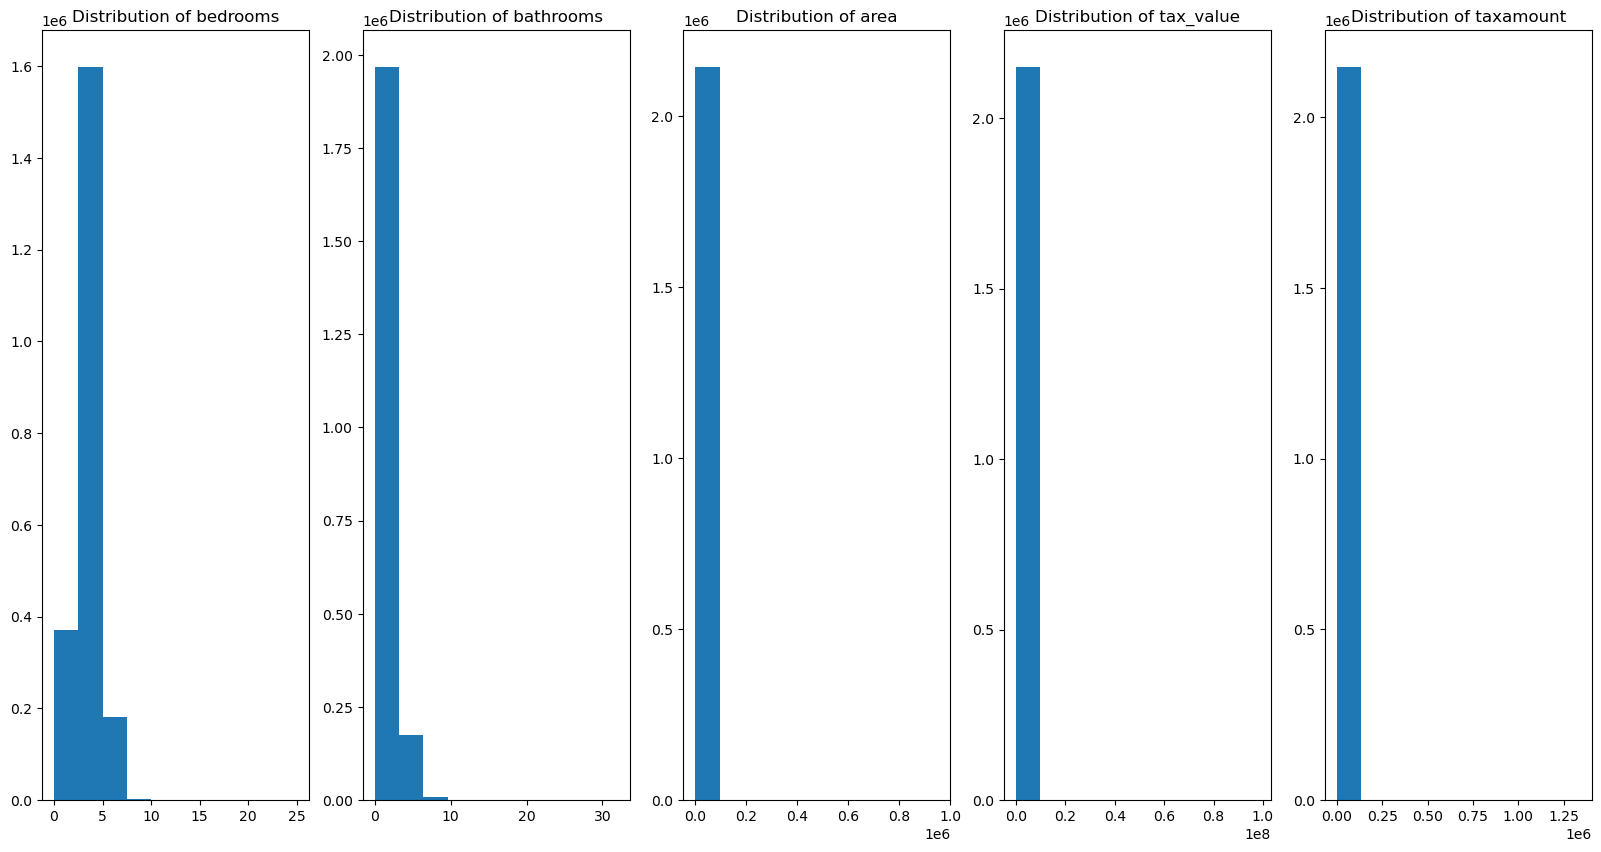

In [35]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    #plot numbers start at 1 in for loop
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=10)
    plt.grid(False)
    plt.ticklabel_format(useOffset=False)
plt.show()

<AxesSubplot:>

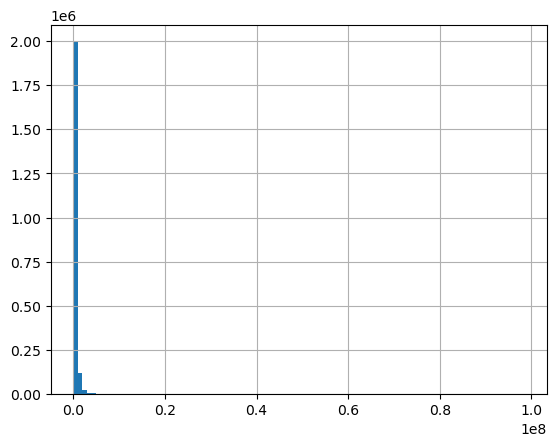

In [36]:
df['tax_value'].hist(bins=100)

<AxesSubplot:>

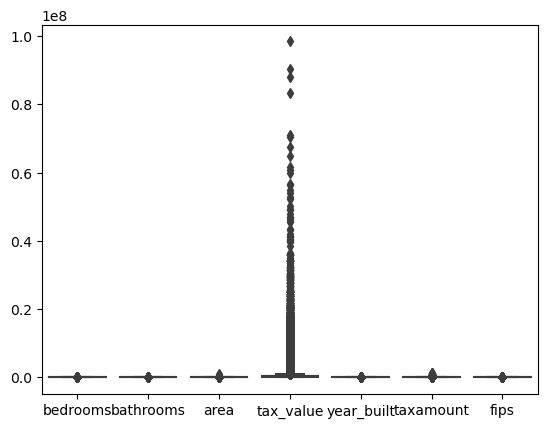

In [37]:
#Boxplot shows outliers as diamonds 
sns.boxplot(data=df)

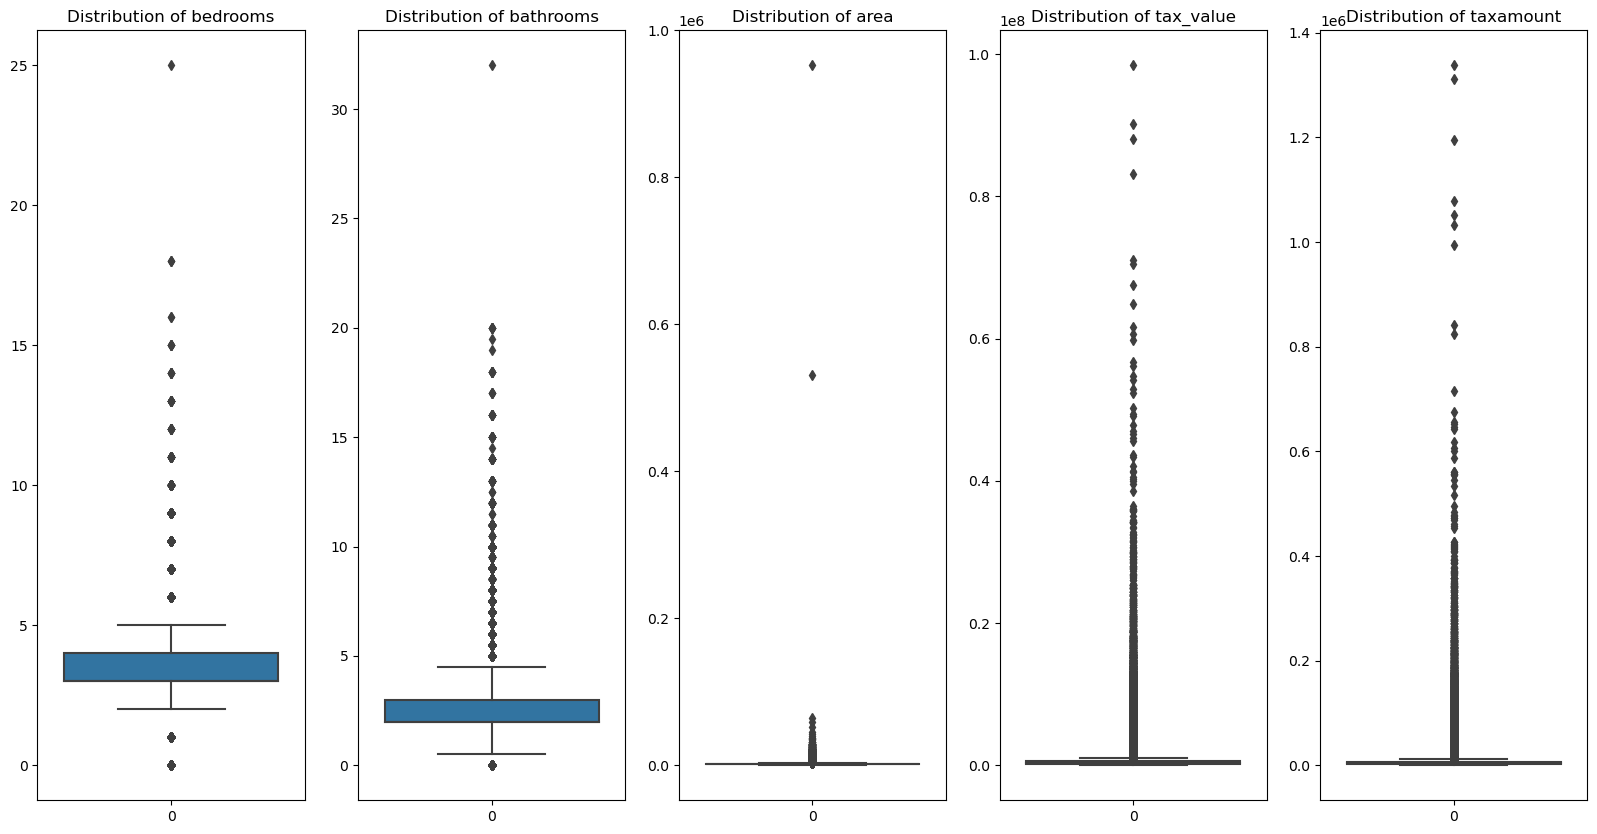

In [38]:
#Boxplot show outliers as diamonds

plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    plt.grid(False)
    sns.boxplot(data=df[col])
plt.show()

## Takeaways
 * Outliers must exist in each column for the x-axis to hae the range shown
 * tax_value looks to have skew due to the x-axis range that goes to 1e8

## Decision Making 
* Outliers are depending on the propertie with 5+ bedrooms and bathrooms. If we need to make a conclusion about
  the regular housing market, we could remove the outliers and analyze only homes in the median range of values
  rather than the high value homes with 5+ bedrooms and bathrooms
  
  Remove the outliers as you work toward your MVP, make notes that your decisions will center around the 
  median homes and analyze the high value properties at a later time.

What are the quartiles of each column?

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathrooms,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
area,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
tax_value,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
year_built,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
taxamount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00


Get Quantile for columns

In [40]:
#pull quartiles for columns
df['bathrooms'].describe()['25%']

2.0

In [41]:
#pull quantile for colum
df['bathrooms'].quantile(.25)

2.0

Separating the top .75 and the bottom .25 from the dataframe

In [42]:
#IQR for bathrooms:
iqr = df['bathrooms'].quantile(0.75) - df['bathrooms'].quantile(0.25)

In [43]:
lower_bathroom_fence = df['bathrooms'].quantile(0.25) - (1.5*iqr)

In [44]:
lower_bathroom_fence

0.5

In [45]:
upper_bathroom_fence = df['bathrooms'].quantile(0.75) + (1.5*iqr)

In [46]:
upper_bathroom_fence

4.5

In [47]:
df[(df.bathrooms > lower_bathroom_fence) & (df.bathrooms < upper_bathroom_fence)].bathrooms.describe()

count    2.065622e+06
mean     2.131432e+00
std      7.741102e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.000000e+00
Name: bathrooms, dtype: float64

In [48]:
col_qs = {}
for col in cols:
    col_qs[col] = q1, q3 = df[col].quantile([0.25, 0.75])

In [49]:
col_qs['bedrooms'][0.25]

3.0

In [50]:
def remove_outliers(df, col_list, k=1.5):
    '''
    remove outliers from a dataframe based on a list of columns
    using the tukey method.
    returns a single dataframe with outliers removed
    '''
    col_qs = {}
    for col in col_list:
        col_qs[col] = q1, q3 = df[col].quantile([0.25, 0.75])
    for col in col_list:
        iqr = col_qs[col][0.75] - col_qs[col][0.25]
        lower_fence = col_qs[col][0.25] - (k*iqr)
        upper_fence = col_qs[col][0.75] + (k*iqr)
        print(type(lower_fence))
        print(lower_fence)
        df = df[(df[col] > lower_fence) & (df[col] < upper_fence)]
    return df

In [51]:
#called remove outliers function
#variable to hold new df with outliers removed

smol_df = remove_outliers(df, cols)

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-169.5
<class 'numpy.float64'>
-331365.5
<class 'numpy.float64'>
-3284.045


In [52]:
df.shape

(2152864, 7)

In [53]:
smol_df.shape

(1907777, 7)

In [54]:
#subtracted original df by df with removed outliers
#This gives the difference in removed values. 
df.shape[0] - smol_df.shape[0]

245087

In [55]:
#Make the above calculation a percent to see what percent
#of the whole data set was the remove outliers. 
round((df.shape[0] - smol_df.shape[0])/ df.shape[0] * 100, 2)

11.38

In [56]:
smol_df.shape

(1907777, 7)

In [57]:
#get the total number of na values 
smol_df.isna().sum()

bedrooms        0
bathrooms       0
area            0
tax_value       0
year_built    904
taxamount       0
fips            0
dtype: int64

In [58]:
#.info() usually shows count but when too many values you 
#must request it with .info(show_counts=True)
smol_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907777 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1907777 non-null  float64
 1   bathrooms   1907777 non-null  float64
 2   area        1907777 non-null  float64
 3   tax_value   1907777 non-null  float64
 4   year_built  1906873 non-null  float64
 5   taxamount   1907777 non-null  float64
 6   fips        1907777 non-null  float64
dtypes: float64(7)
memory usage: 116.4 MB


## Takeaways
* A large amount of outliers exist
* If building a model based on median home values we can drop the outliers
* Dropping outliers may also lower our null values count

## Rivisualize Distributions

In [59]:
#assign the median values to the original df
df=smol_df

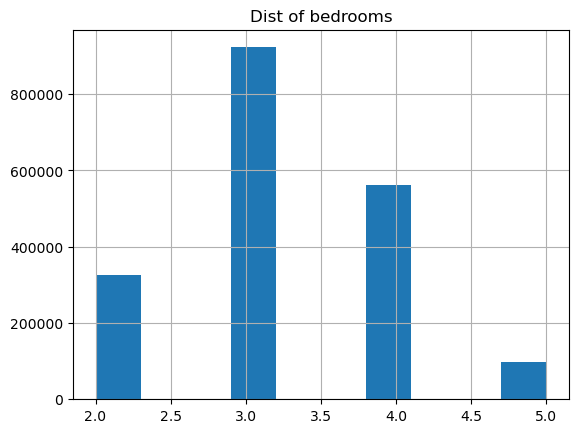

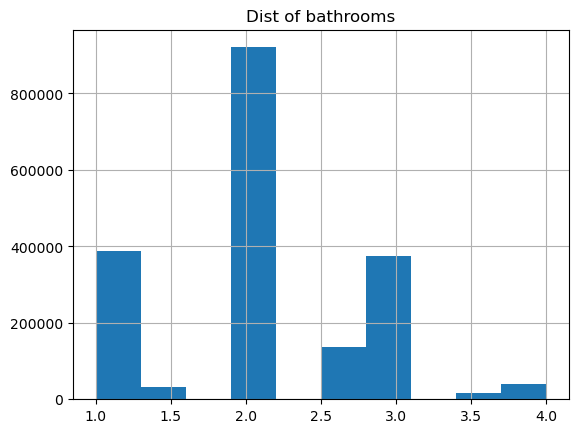

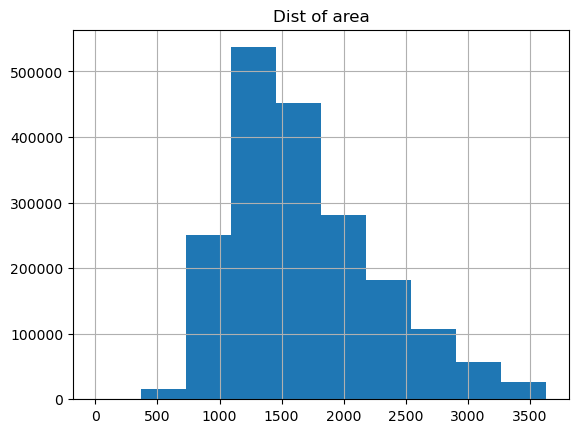

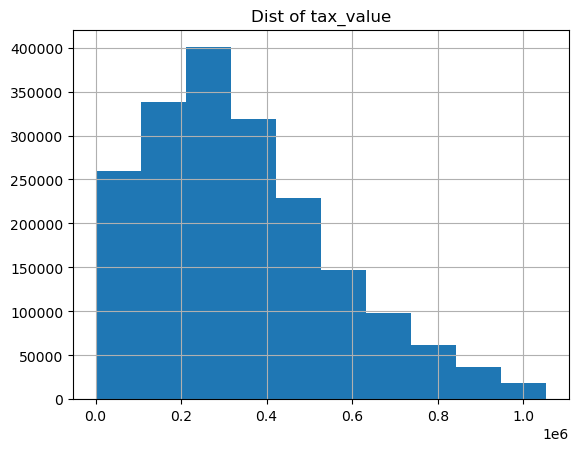

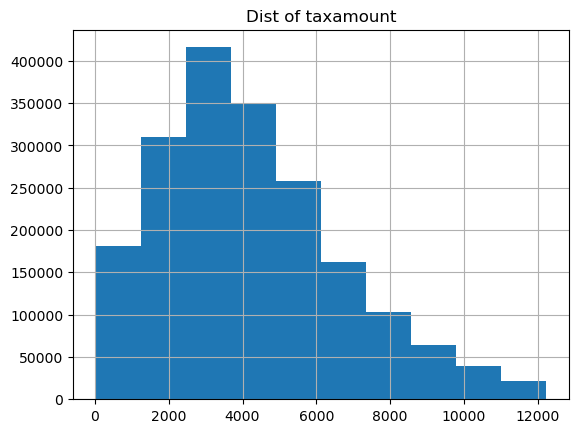

In [60]:
#creat hist plot of columns in df
for col in cols:
    df[col].hist()
    plt.title(f'Dist of {col}')
    plt.show()
    print('==========')

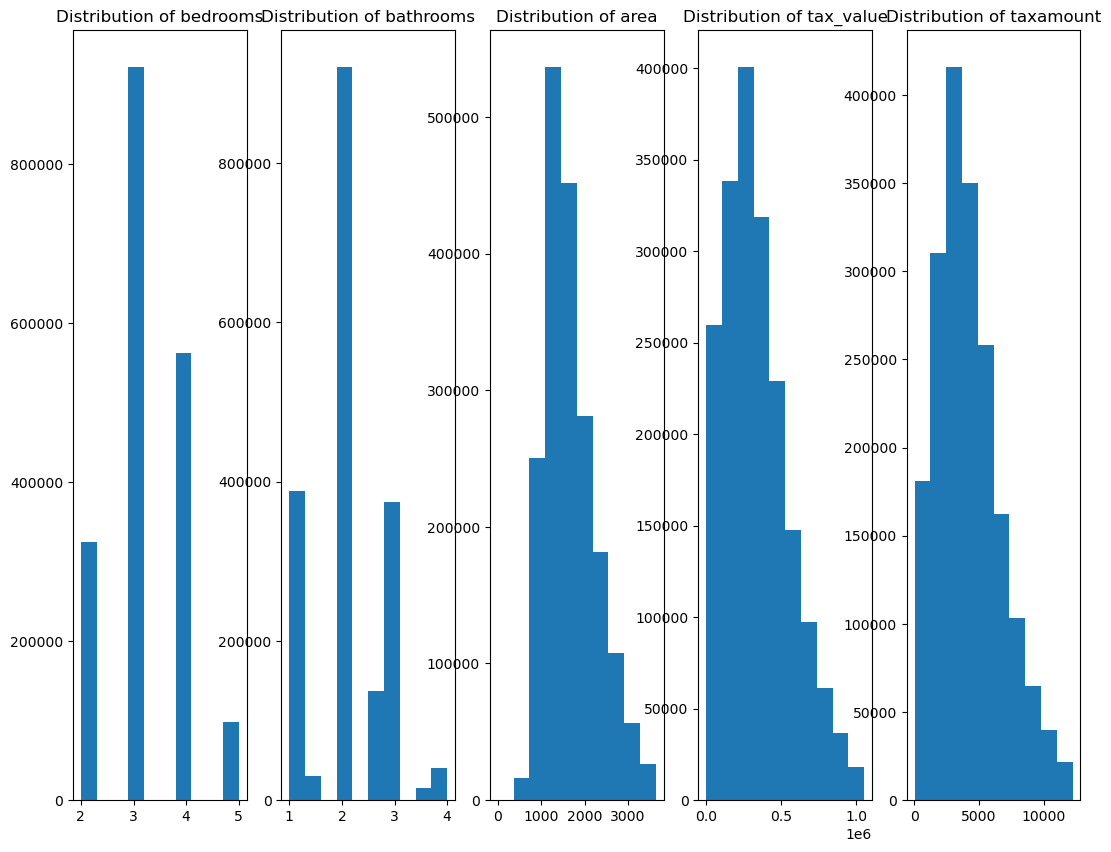

In [61]:
#show the distribution breakdown of each column in the median df
plt.figure(figsize=(13,10))
for i, col in enumerate(cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=10)
    plt.grid(False)
    plt.ticklabel_format(useOffset=False)
plt.show()

## Takeaways
* Bedrooms and bathrooms are not normally distributed
* Other columns are skewed but are more normally distributed

* We still have outliers dispite the 1.5 * IQR restrictive setting for the top/bottom 25% bands
* No need to remove the few remaining outliers

## How do null values look now?
* null values have been cleaned up by removing outliers
* the mean, median, and mode are all relatively similar to each other
* We could try and develop a complex imputation method to estimate the year built based off other columns
  but for speed we will just use the median. 

In [62]:
round(df['year_built'].isna().sum() / len(df), 9)

0.00047385

In [63]:
df.isna().sum()

bedrooms        0
bathrooms       0
area            0
tax_value       0
year_built    904
taxamount       0
fips            0
dtype: int64

In [64]:
len(df), df.shape[0]

(1907777, 1907777)

def wrangle_zillow(df):
    '''Wrangle zillow will clean the data and update missing values 
    for the df'''
   #Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.
    df = df.replace(r'^\s*$', np.nan, regex=True)    
    #drop any duplicates in the df
    df = df.drop_duplicates()
    #filled nan values with 0 
    df = df.fillna(0)
    return df


In [65]:
df

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
...,...,...,...,...,...,...,...
2152853,3.0,2.0,1917.0,408680.0,1946.0,4341.32,6111.0
2152854,4.0,2.0,1987.0,259913.0,1955.0,3175.66,6059.0
2152856,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [66]:
#missing_percent = 0.98
missing_thresh = 0.05
exclude_missing = []
num_rows = df.shape[0]
for c in df.columns:
    # calculate the missing values
    num_missing = df[c].isna().sum()
    # make the ratio of the number missing over all values
    missing_frac = num_missing / num_rows
    # if missing values fraction is greater than the missing thresh:
    if missing_frac > missing_thresh:
        exclude_missing.append(c)

In [67]:
exclude_missing

[]

In [68]:
df.drop(columns='year_built')

,bedrooms,bathrooms,area,tax_value,taxamount,fips
4,4.0,2.0,3633.0,296425.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,3110.99,6037.0
...,...,...,...,...,...,...
2152853,3.0,2.0,1917.0,408680.0,4341.32,6111.0
2152854,4.0,2.0,1987.0,259913.0,3175.66,6059.0
2152856,3.0,2.5,1809.0,405547.0,4181.10,6059.0
2152862,3.0,2.5,1974.0,424353.0,5302.70,6059.0


In [69]:
# Notes for ourselves: we only have the one column with missing info,
# and its a pretty small number of values,
# So i'm going to ahead and choose to use an imputer for these values

## What if removing the outliers didn't clean up our nulls? What would we do then?
.dropna() We can utilize some of the parameters of .dropna() to clean up our nulls:

* axis: {0 or ‘index’, 1 or ‘columns’}, default 0
       * 0, or ‘index’ : Drop rows which contain missing values.
       * 1, or ‘columns’ : Drop columns which contain missing value.
* how: {‘any’, ‘all’}, default ‘any’
       * ‘any’ : If any NA values are present, drop that row or column.
       * ‘all’ : If all values are NA, drop that row or column.
* thresh: int, optional
       * Require that many non-NA values.
* subset: array-like, optional
       * Give the columns to consider, ignore non-listed columns

Thresh is useful, but it is limited to an integer amount. What if we wanted to remove columns that had a certain proportion of na values?

## Are the column data types correct

In [70]:
for col in df.columns:
    print(f'Column: {col}')
    print(df[col].describe())
    print('==============')

Column: bedrooms
count    1.907777e+06
mean     3.226660e+00
std      7.864515e-01
min      2.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: bedrooms, dtype: float64
Column: bathrooms
count    1.907777e+06
mean     2.075743e+00
std      7.213485e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.500000e+00
max      4.000000e+00
Name: bathrooms, dtype: float64
Column: area
count    1.907777e+06
mean     1.680690e+03
std      5.923135e+02
min      1.000000e+00
25%      1.239000e+03
50%      1.562000e+03
75%      2.024000e+03
max      3.634000e+03
Name: area, dtype: float64
Column: tax_value
count    1.907777e+06
mean     3.418999e+05
std      2.155824e+05
min      2.200000e+01
25%      1.775200e+05
50%      3.034080e+05
75%      4.676380e+05
max      1.054000e+06
Name: tax_value, dtype: float64
Column: year_built
count    1.906873e+06
mean     1.959753e+03
std      2.079616e+01
min      1.801000e+03
2

* casting fips and year built as an object because it is a numerical represintation of a catagorical value
* leaving the rest as floats

In [71]:
# I did the imputation before the split for the sake of demonstration
# note that we would not do this in production, 
# hence its not reflected in my wrangle.py :)

In [72]:
# fixing the year values that are missing

In [73]:
year_imputer = SimpleImputer()
year_imputer.fit(df[['year_built']])

SimpleImputer()

In [74]:
df['year_built'] = year_imputer.transform(df[['year_built']])

In [75]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907777 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1907777 non-null  float64
 1   bathrooms   1907777 non-null  float64
 2   area        1907777 non-null  float64
 3   tax_value   1907777 non-null  float64
 4   year_built  1907777 non-null  float64
 5   taxamount   1907777 non-null  float64
 6   fips        1907777 non-null  float64
dtypes: float64(7)
memory usage: 116.4 MB


## Target Leakage 
Consider the goal of the model to be developed:

Build an end-to-end project in which you use some of their Kaggle data to predict property values
taxamount is determined by a real estate tax appraisers valuation of the home combined with the local tax rate.

The question to consider, does this represent information that we wouldn't have at the time of prediction? Does this represent the target variable? This is where specific domain knowledge is very important.

Tax appraised values often deviate from the sale price of a property due to a number of reasons:

* Unlike market value, homeowners are incentivized to reduce their tax value appraisal. As a result, some homeowners may misrepresent the features/size of their property to avoid a bigger tax bill
* Some counties limit the tax appraisal increase to a set amount, causing tax appraised value to significantly lag behind home values in hot markets
* Local tax appraisers evaluate homes based on evaluation criteria that can differ from county to county or even year to year based on political and administrative pressures

This data is a snapshot of home information in 2017. There is an additional column in the database containing assessment year. This might be useful to know the recency of any given taxamount value.

When a home is being appraised to evaluate for market pricing, prior years home value is not considered in that price determination. That doesn't mean that prior years home value is not predictive of price. It could be. For this reason, we will allow taxamount to remain in the dataset.

Without this specific domain knowledge, this column seems to represent the risk of target leak. If you are in a situation where you don't know if you have a target leak situation, its probably generally better to err on the side of caution.

In [76]:
## Split the data 
#can impute after the split has been done. 

In [77]:
'''Wrangles data from Zillow Database'''

##################################################Wrangle.py###################################################

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from env import user, password, host

#**************************************************Acquire*******************************************************

def acquire_zillow():
    ''' Acquire data from Zillow using env imports and rename columns'''
    
    url = f"mysql+pymysql://{user}:{password}@{host}/zillow"
    
    query = """
            
    SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
    FROM properties_2017

    LEFT JOIN propertylandusetype USING(propertylandusetypeid)

    WHERE propertylandusedesc IN ("Single Family Residential",                       
                                  "Inferred Single Family Residential")"""

    # get dataframe of data
    df = pd.read_sql(query, url)
    
    
    # renaming column names to one's I like better
    df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                              'bathroomcnt':'bathrooms', 
                              'calculatedfinishedsquarefeet':'area',
                              'taxvaluedollarcnt':'tax_value', 
                              'yearbuilt':'year_built',})
    return df

#**************************************************Remove Outliers*******************************************************

def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

#**************************************************Distributions*******************************************************

def get_hist(df):
    ''' Gets histographs of acquired continuous variables'''
    
    plt.figure(figsize=(16, 3))

    # List of columns
    cols = [col for col in df.columns if col not in ['fips', 'year_built']]

    for i, col in enumerate(cols):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display histogram for column.
        df[col].hist(bins=5)

        # Hide gridlines.
        plt.grid(False)

        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)

        plt.tight_layout()

    plt.show()
        
        
def get_box(df):
    ''' Gets boxplots of acquired continuous variables'''
    
    # List of columns
    cols = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

    plt.figure(figsize=(16, 3))

    for i, col in enumerate(cols):

        # i starts at 0, but plot should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display boxplot for column.
        sns.boxplot(data=df[[col]])

        # Hide gridlines.
        plt.grid(False)

        # sets proper spacing between plots
        plt.tight_layout()

    plt.show()
        
#**************************************************Prepare*******************************************************

def prepare_zillow(df):
    ''' Prepare zillow data for exploration'''

    # removing outliers
    df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount'])
    
    # get distributions of numeric data
    get_hist(df)
    get_box(df)
    
    # converting column datatypes
    df.fips = df.fips.astype(object)
    df.year_built = df.year_built.astype(object)
    
    # train/validate/test split
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
    # impute year built using mode
    imputer = SimpleImputer(strategy='median')

    imputer.fit(train[['year_built']])

    train[['year_built']] = imputer.transform(train[['year_built']])
    validate[['year_built']] = imputer.transform(validate[['year_built']])
    test[['year_built']] = imputer.transform(test[['year_built']])       
    
    return train, validate, test    


#**************************************************Wrangle*******************************************************


def wrangle_zillow():
    '''Acquire and prepare data from Zillow database for explore'''
    train, validate, test = prepare_zillow(acquire_zillow())
    
    return train, validate, test

In [79]:
#import from wrangle file wrangle_zillow function
from wrangle import wrangle_zillow

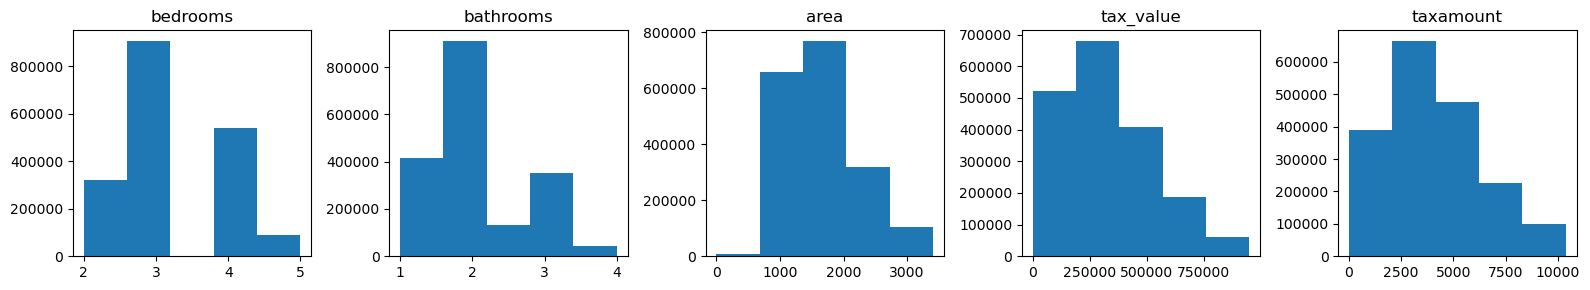

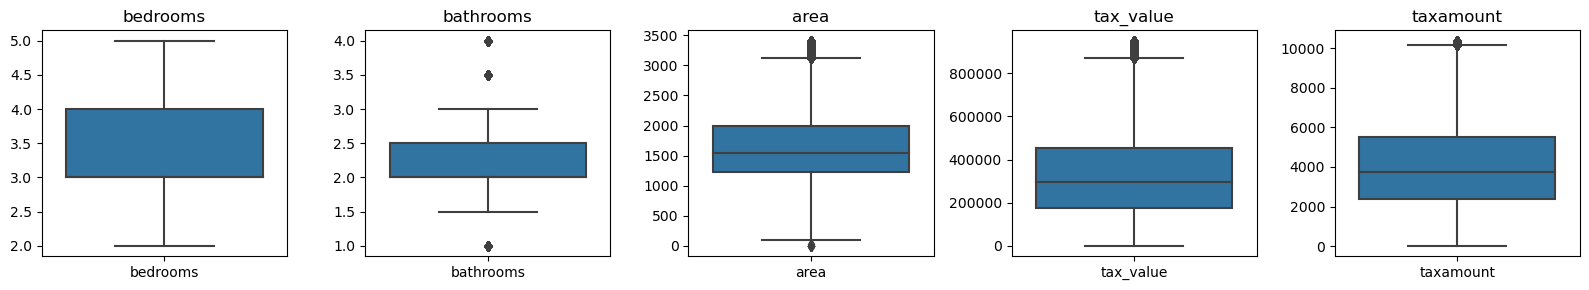

In [81]:
#return split for each graphed out
train, val, test = wrangle.wrangle_zillow()


In [82]:
train.shape, val.shape, test.shape

((1038959, 7), (445269, 7), (371057, 7))